In [187]:
from Model import Levels, ElectronsTransitionsData, AtomsTransitionsData, PickAndSolve, UFloat, utilities
import numpy as np
import pandas as pd
from Model.utilities import n_, s_
from tqdm.auto import tqdm
from PlotUtils.saveToCsv import saveToCsv, getNextFilename

from PlotUtils import errsPlot as plt, splt

splt.set_export_folder(".")

In [188]:
n_g = 2.687e25
T_g = 300

In [189]:
data = pd.read_csv('exports/SimulatedData.csv', index_col = False).to_dict('list')

data['density'] = [ UFloat.UFloat( n, s ) for n, s in zip( data['density_n'], data['density_s'] ) ]
data['label_idx'] = Levels.Levels().namesToIdxs( data['label'] )

In [190]:
f_es = np.logspace( -10, 0, 5 )
T_es = np.logspace( np.log10( 0.11), np.log10( 19.8 ), 3 )

real_value = {
    'T_e' : 2,
    'f_e' : 10**-5
}

In [191]:
chisquared = np.zeros( ( len( f_es ), len( T_es ) ) )
real_value['chi2'] = 0
reps = 2

for k in tqdm( range( reps ), total = reps ):
    pas = PickAndSolve.PickAndSolve()
    for i, f_e in enumerate( f_es ):
        for j, T_e in enumerate( T_es ):
            chisquared[ i, j ] += pas.chiSquared_frompars( data['density'], data['label_idx'], n_g, f_e, T_e, T_g )
    real_value['chi2'] += pas.chiSquared_frompars( data['density'], data['label_idx'], n_g, real_value['f_e'], real_value['T_e'], T_g )


for i, f_e in enumerate( f_es ):
    for j, T_e in enumerate( T_es ):
        chisquared[ i, j ] = chisquared[ i, j ] / reps
real_value['chi2'] = real_value['chi2'] / reps

  0%|          | 0/2 [00:00<?, ?it/s]

In [192]:
f_esm, T_esm = np.meshgrid( f_es, T_es )
filename = saveToCsv( { 'f_es': f_esm.flatten(), 'T_es': T_esm.flatten(), 'chisquared': chisquared.flatten() } )

Saved as results/r004


In [ ]:
# Load data
# filename = 'results/r003'

# prev = pd.read_csv( filename + '.csv', index_col = False )

# f_es = np.unique( prev['f_es'].to_numpy() )
# T_es = np.unique( prev['T_es'].to_numpy() )
# chisquared = prev['chisquared'].to_numpy().reshape( ( len( f_es ), len( T_es ) ) )

./results/r003_chisquared_countourf.pdf


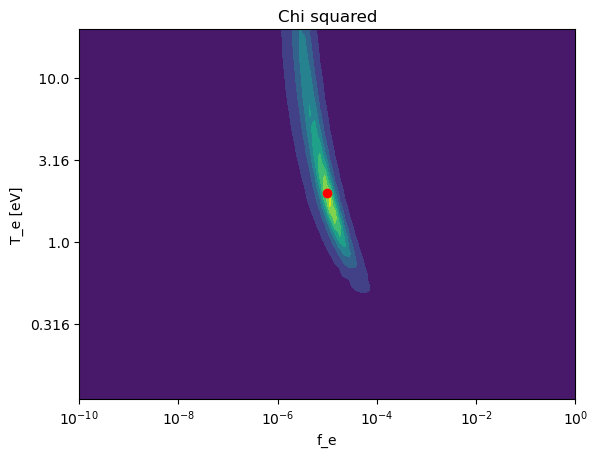

In [199]:
plt.contourf( np.log10( f_es ), np.log10( T_es ), 1 / chisquared.T )

xticks = plt.xticks( )
plt.xticks( xticks[0], [ f"$10^{{{x.get_text()}}}$" for x in xticks[1] ] )
yticks = plt.yticks( )[0][1:-1]
plt.yticks( yticks, [ f"{x:5.3}" for x in 10**yticks ] )

plt.plot( np.log10( real_value['f_e'] ), np.log10( real_value['T_e'] ), 'ro' )

plt.xlabel("f_e")
plt.ylabel("T_e [eV]")

plt.title("Chi squared")

splt.export( filename + "_chisquared_countourf" )

In [211]:
chisquared_f_e = np.min( chisquared, axis = 1 )
chisquared_T_e = np.min( chisquared, axis = 0 )

chisquared_f_e_idx = np.where( 1 / chisquared_f_e > 1 / np.min( chisquared_f_e ) * 0.75 )
chisquared_T_e_idx = np.where( 1 / chisquared_T_e > 1 / np.min( chisquared_T_e ) * 0.75 )

./results/r003_1OverChisquared_3d.pdf


Text(0, 0.5, 'Maximum of chisquared varying f_e')

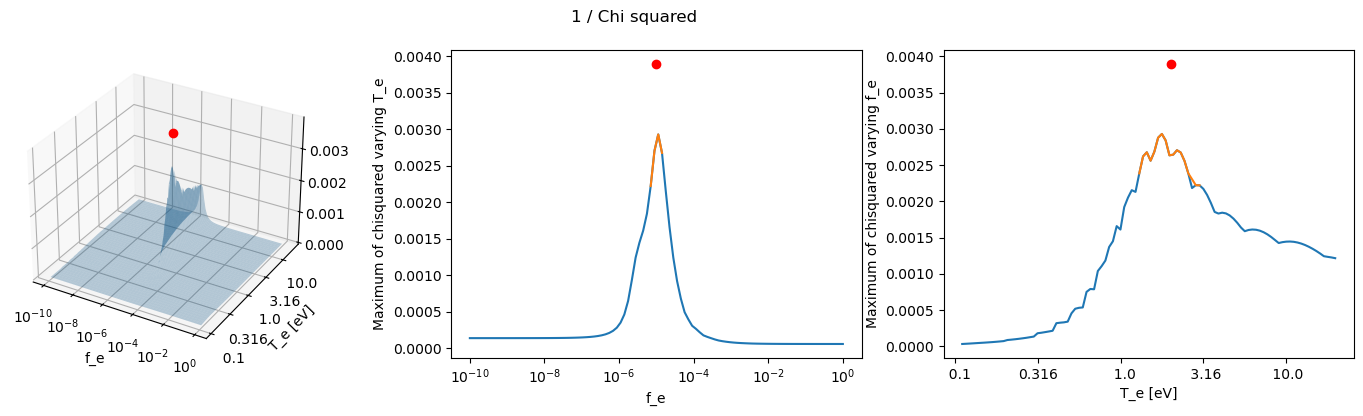

In [212]:
ax = plt.figure( figsize = ( 18, 4 ) ).add_subplot(1, 3, 1, projection='3d')
ax.plot_surface( *np.meshgrid(np.log10( f_es), np.log10( T_es)), 1 / chisquared.T, alpha=0.3 )


xticks = plt.xticks( )
plt.xticks( xticks[0][1:-1], [ f"$10^{{{x.get_text()}}}$" for x in xticks[1][1:-1] ] )
yticks = plt.yticks( )[0][1:-1]
plt.yticks( yticks, [ f"{x:5.3}" for x in 10**yticks ] )

ax.plot( np.log10( real_value['f_e'] ), np.log10( real_value['T_e'] ), 1 / real_value['chi2'], 'ro' )

plt.xlabel("f_e")
plt.ylabel("T_e [eV]")

plt.suptitle("1 / Chi squared")

splt.export( filename + "_1OverChisquared_3d" )

ax = plt.gcf().add_subplot( 1, 3, 2 )
plt.plot( np.log10( f_es ), 1 / chisquared_f_e )
plt.plot( np.log10( f_es )[chisquared_f_e_idx], 1 / chisquared_f_e[chisquared_f_e_idx] )
plt.plot( np.log10( real_value['f_e'] ), 1 / real_value['chi2'], 'ro' )

xticks = plt.xticks( )
plt.xticks( xticks[0][1:-1], [ f"$10^{{{x.get_text()}}}$" for x in xticks[1][1:-1] ] )
plt.xlabel("f_e")
plt.ylabel("Maximum of chisquared varying T_e")

ax = plt.gcf().add_subplot( 1, 3, 3 )
plt.plot( np.log10( T_es ), 1 / chisquared_T_e )
plt.plot( np.log10( T_es )[chisquared_T_e_idx], 1 / chisquared_T_e[chisquared_T_e_idx] )
plt.plot( np.log10( real_value['T_e'] ), 1 / real_value['chi2'], 'ro' )

xticks = plt.xticks( )[0][1:-1]
plt.xticks( xticks, [ f"{x:5.3}" for x in 10**xticks ] )
plt.xlabel("T_e [eV]")
plt.ylabel("Maximum of chisquared varying f_e")


In [195]:
n_atreal = np.mean( [ PickAndSolve.PickAndSolve().getEquilibrium( n_g, real_value['f_e'], real_value['T_e'], T_g )[ data['label_idx'] ] for i in range(100) ], axis = 0 )
n_atmax = np.mean( [ PickAndSolve.PickAndSolve().getEquilibrium( n_g, f_es[ np.argmax( np.max( 1 / chisquared, axis = 1 ) )], T_es[ np.argmax( np.max( 1 / chisquared, axis = 0 ) )], T_g )[ data['label_idx'] ] for i in range(100) ], axis = 0 )

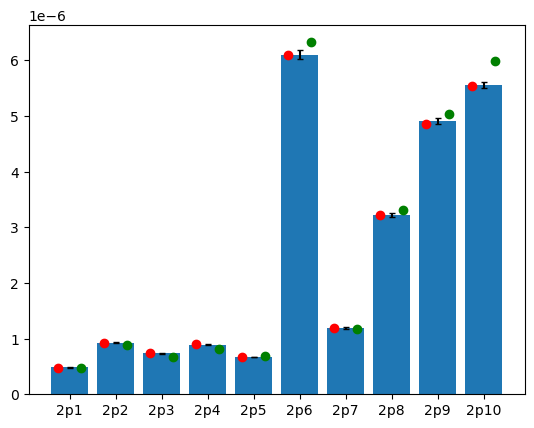

In [196]:
plt.bar( data['label'], data['density'] )
plt.plot( np.arange( len( data['label'] ) ) - 0.25, n_atreal * scalefact( data['density'], n_atreal ), 'ro' )
plt.plot( np.arange( len( data['label'] ) ) + 0.25, n_atmax * scalefact( data['density'], n_atmax ), 'go' )